In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

data_path = 'C:/Users/PandaBas/Desktop/Personal/Teaching/Logistic_Regression/weatherBang.csv'
df = pd.read_csv(data_path)
df.head()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindDir  \
0  12/1/2008     13.4     22.9       0.6          NaN       NaN       W   
1  12/2/2008      7.4     25.1       0.0          NaN       NaN     WNW   
2  12/3/2008     12.9     25.7       0.0          NaN       NaN     WSW   
3  12/4/2008      9.2     28.0       0.0          NaN       NaN      NE   
4  12/5/2008     17.5     32.3       1.0          NaN       NaN       W   

   WindSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0       44.0          W        WNW  ...         71.0         22.0   
1       44.0        NNW        WSW  ...         44.0         25.0   
2       46.0          W        WSW  ...         38.0         30.0   
3       24.0         SE          E  ...         45.0         16.0   
4       41.0        ENE         NW  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 22 columns]

## Exploratory data analysis

In [151]:
df.shape

(142193, 22)

In [152]:
col_names = df.columns

col_names

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindDir', 'WindSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [153]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          142193 non-null  object 
 1   MinTemp       141556 non-null  float64
 2   MaxTemp       141871 non-null  float64
 3   Rainfall      140787 non-null  float64
 4   Evaporation   81350 non-null   float64
 5   Sunshine      74377 non-null   float64
 6   WindDir       132863 non-null  object 
 7   WindSpeed     132923 non-null  float64
 8   WindDir9am    132180 non-null  object 
 9   WindDir3pm    138415 non-null  object 
 10  WindSpeed9am  140845 non-null  float64
 11  WindSpeed3pm  139563 non-null  float64
 12  Humidity9am   140419 non-null  float64
 13  Humidity3pm   138583 non-null  float64
 14  Pressure9am   128179 non-null  float64
 15  Pressure3pm   128212 non-null  float64
 16  Cloud9am      88536 non-null   float64
 17  Cloud3pm      85099 non-null   float64
 18  Temp

## Parse Date column

In [154]:
df['Date'].dtypes

dtype('O')

In [155]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [156]:
# extract year,month,date from date

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [157]:
# again view the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          142193 non-null  datetime64[ns]
 1   MinTemp       141556 non-null  float64       
 2   MaxTemp       141871 non-null  float64       
 3   Rainfall      140787 non-null  float64       
 4   Evaporation   81350 non-null   float64       
 5   Sunshine      74377 non-null   float64       
 6   WindDir       132863 non-null  object        
 7   WindSpeed     132923 non-null  float64       
 8   WindDir9am    132180 non-null  object        
 9   WindDir3pm    138415 non-null  object        
 10  WindSpeed9am  140845 non-null  float64       
 11  WindSpeed3pm  139563 non-null  float64       
 12  Humidity9am   140419 non-null  float64       
 13  Humidity3pm   138583 non-null  float64       
 14  Pressure9am   128179 non-null  float64       
 15  Pressure3pm   128

## Identify Numeric with categorical variables

In [158]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['WindDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [159]:
# view the categorical variables

df[categorical].head()

WindDir WindDir9am WindDir3pm RainToday RainTomorrow
0       W          W        WNW        No           No
1     WNW        NNW        WSW        No           No
2     WSW          W        WSW        No           No
3      NE         SE          E        No           No
4       W        ENE         NW        No           No

## Check Missing value for categorical variables



In [160]:
# check missing values in categorical variables

df[categorical].isnull().sum()

WindDir          9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

## check for cardinality in categorical variables

In [161]:
for var in categorical:    
    print(var, ' contains ', len(df[var].unique()), ' labels')

WindDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


## Check Numeric variables

In [162]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 20 numerical variables

The numerical variables are : ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


## Check missing values in numerical variables

In [163]:
# check missing values in numerical variables
df[numerical].isnull().sum()

Date                0
MinTemp           637
MaxTemp           322
Rainfall         1406
Evaporation     60843
Sunshine        67816
WindSpeed        9270
WindSpeed9am     1348
WindSpeed3pm     2630
Humidity9am      1774
Humidity3pm      3610
Pressure9am     14014
Pressure3pm     13981
Cloud9am        53657
Cloud3pm        57094
Temp9am           904
Temp3pm          2726
Year                0
Month               0
Day                 0
dtype: int64

## Outliers in numerical variables

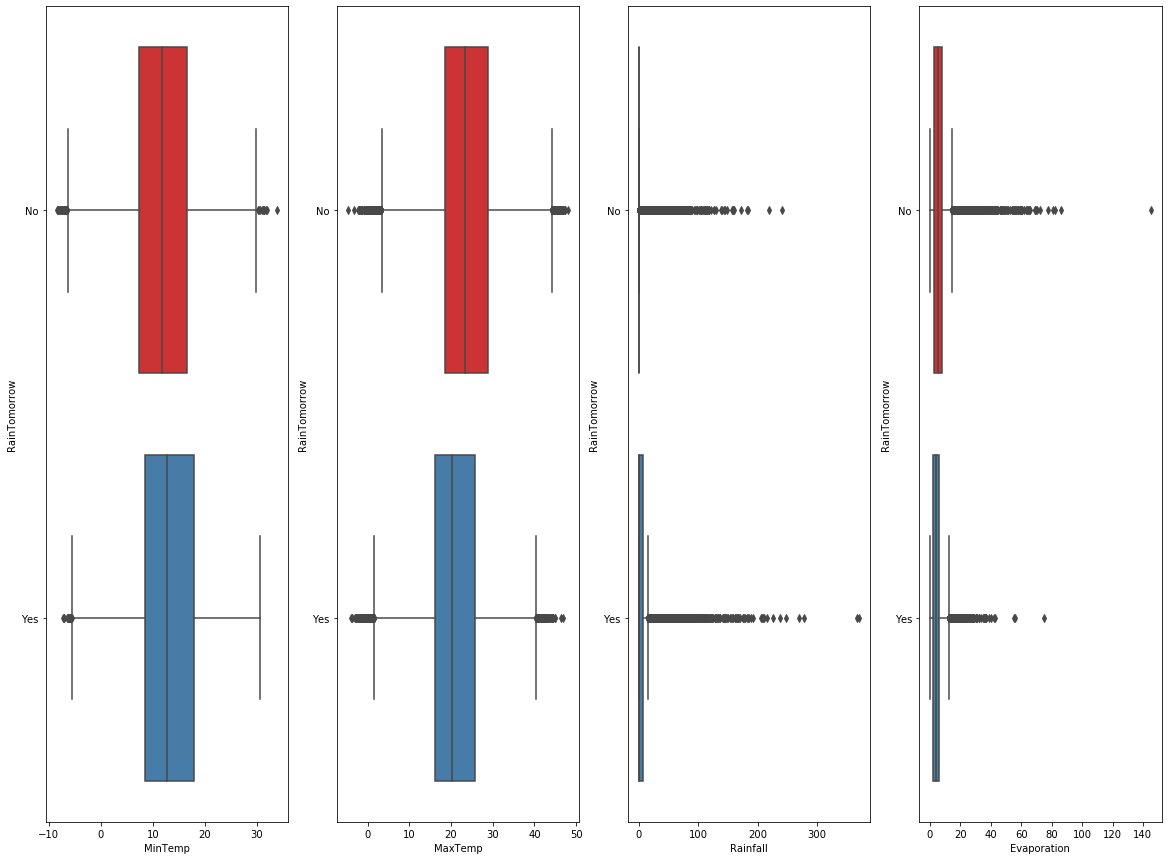

In [164]:
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']
plt.figure(figsize=(20,15))
for n, column in enumerate(columns):
    ax = plt.subplot(1, 4, n + 1)
    sns.boxplot(x=column, y="RainTomorrow", data=df, palette="Set1")

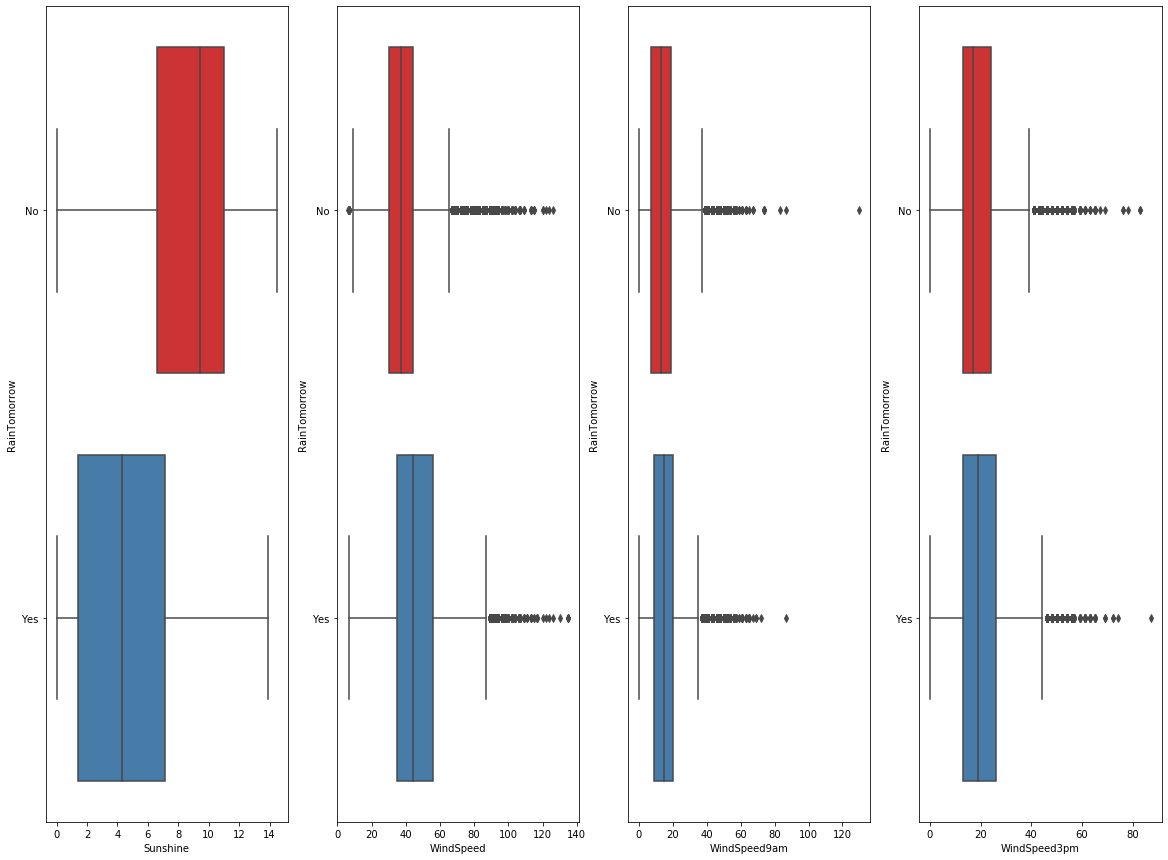

In [165]:
columns = ['Sunshine', 'WindSpeed', 'WindSpeed9am', 'WindSpeed3pm']
plt.figure(figsize=(20,15))
for n, column in enumerate(columns):
    ax = plt.subplot(1, 4, n + 1)
    sns.boxplot(x=column, y="RainTomorrow", data=df, palette="Set1")

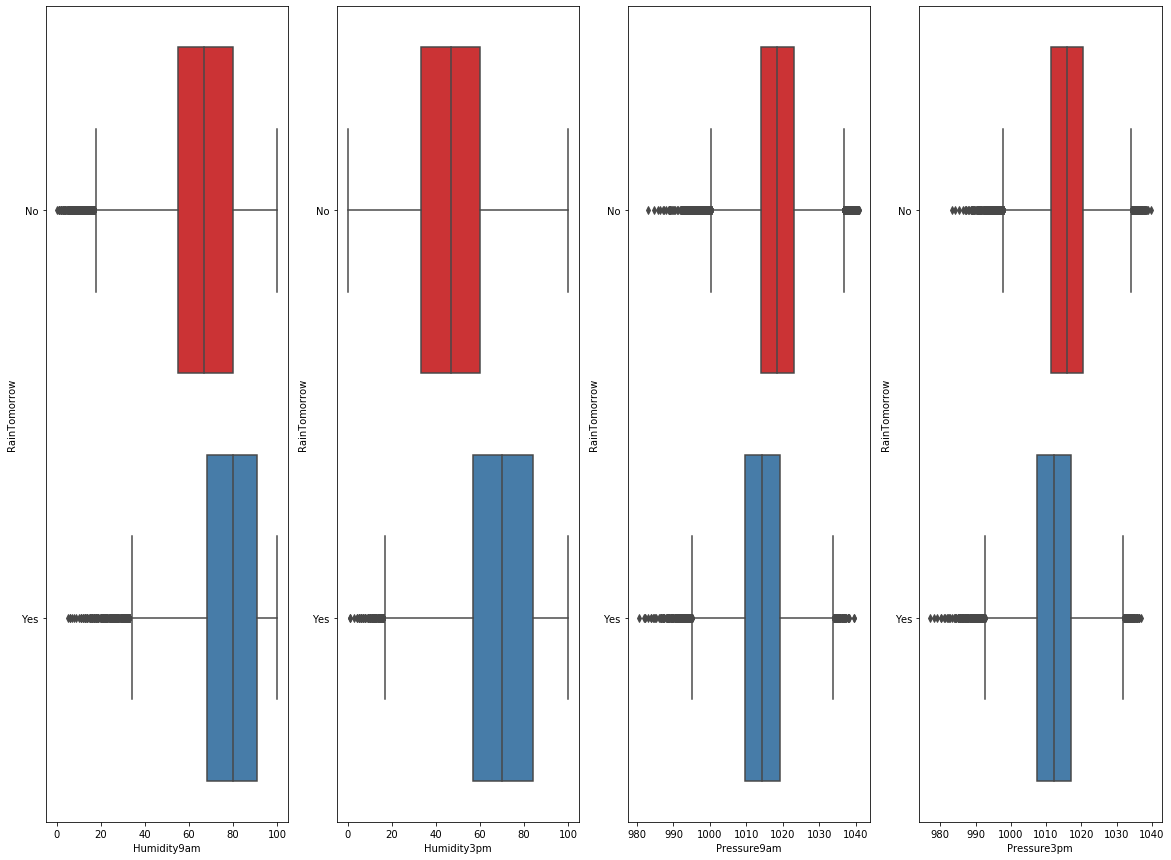

In [166]:
columns = ['Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']
plt.figure(figsize=(20,15))
for n, column in enumerate(columns):
    ax = plt.subplot(1, 4, n + 1)
    sns.boxplot(x=column, y="RainTomorrow", data=df, palette="Set1")

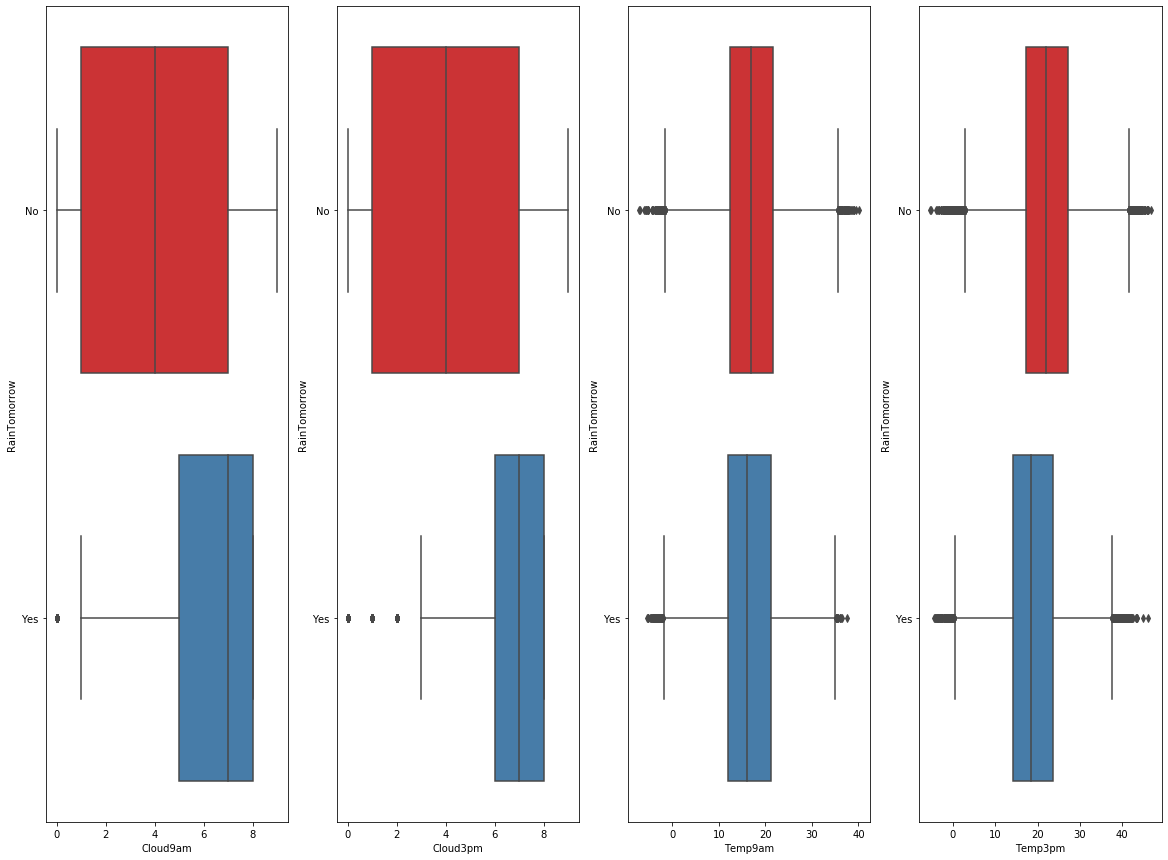

In [167]:
columns = ['Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
plt.figure(figsize=(20,15))
for n, column in enumerate(columns):
    ax = plt.subplot(1, 4, n + 1)
    sns.boxplot(x=column, y="RainTomorrow", data=df, palette="Set1")

In [168]:
# find outliers for MinTemp variable

IQR = df.MinTemp.quantile(0.75) - df.MinTemp.quantile(0.25)
Lower_fence = df.MinTemp.quantile(0.25) - (IQR * 3)
Upper_fence = df.MinTemp.quantile(0.75) + (IQR * 3)
print('MinTemp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

MinTemp outliers are values < -20.0 or > 44.400000000000006


In [169]:
# find outliers for MaxTemp variable

IQR = df.MaxTemp.quantile(0.75) - df.MaxTemp.quantile(0.25)
Lower_fence = df.MaxTemp.quantile(0.25) - (IQR * 3)
Upper_fence = df.MaxTemp.quantile(0.75) + (IQR * 3)
print('MaxTemp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

MaxTemp outliers are values < -13.000000000000004 or > 59.1


In [170]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [171]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [172]:
# find outliers for Sunshine variable

IQR = df.Sunshine.quantile(0.75) - df.Sunshine.quantile(0.25)
Lower_fence = df.Sunshine.quantile(0.25) - (IQR * 3)
Upper_fence = df.Sunshine.quantile(0.75) + (IQR * 3)
print('Sunshine outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Sunshine outliers are values < -12.199999999999998 or > 27.699999999999996


In [173]:
# find outliers for WindSpeed variable

IQR = df.WindSpeed.quantile(0.75) - df.WindSpeed.quantile(0.25)
Lower_fence = df.WindSpeed.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed.quantile(0.75) + (IQR * 3)
print('WindSpeed outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed outliers are values < -20.0 or > 99.0


In [174]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [175]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [176]:
# find outliers for Humidity9am variable

IQR = df.Humidity9am.quantile(0.75) - df.Humidity9am.quantile(0.25)
Lower_fence = df.Humidity9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.Humidity9am.quantile(0.75) + (IQR * 3)
print('Humidity9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Humidity9am outliers are values < -21.0 or > 161.0


In [177]:
# find outliers for Humidity3pm variable

IQR = df.Humidity3pm.quantile(0.75) - df.Humidity3pm.quantile(0.25)
Lower_fence = df.Humidity3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.Humidity3pm.quantile(0.75) + (IQR * 3)
print('Humidity3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Humidity3pm outliers are values < -50.0 or > 153.0


In [178]:
# find outliers for Pressure9am variable

IQR = df.Pressure9am.quantile(0.75) - df.Pressure9am.quantile(0.25)
Lower_fence = df.Pressure9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.Pressure9am.quantile(0.75) + (IQR * 3)
print('Pressure9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Pressure9am outliers are values < 984.4 or > 1050.9


In [179]:
# find outliers for Pressure3pm variable

IQR = df.Pressure3pm.quantile(0.75) - df.Pressure3pm.quantile(0.25)
Lower_fence = df.Pressure3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.Pressure3pm.quantile(0.75) + (IQR * 3)
print('Pressure3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Pressure3pm outliers are values < 981.5999999999999 or > 1048.8000000000002


In [180]:
# find outliers for Cloud9am variable

IQR = df.Cloud9am.quantile(0.75) - df.Cloud9am.quantile(0.25)
Lower_fence = df.Cloud9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.Cloud9am.quantile(0.75) + (IQR * 3)
print('Cloud9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Cloud9am outliers are values < -17.0 or > 25.0


In [181]:
# find outliers for Cloud3pm variable

IQR = df.Cloud3pm.quantile(0.75) - df.Cloud3pm.quantile(0.25)
Lower_fence = df.Cloud3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.Cloud3pm.quantile(0.75) + (IQR * 3)
print('Cloud3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Cloud3pm outliers are values < -13.0 or > 22.0


In [182]:
# find outliers for Temp9am variable

IQR = df.Temp9am.quantile(0.75) - df.Temp9am.quantile(0.25)
Lower_fence = df.Temp9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.Temp9am.quantile(0.75) + (IQR * 3)
print('Temp9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Temp9am outliers are values < -15.600000000000001 or > 49.5


In [183]:
# find outliers for Temp3pm variable

IQR = df.Temp3pm.quantile(0.75) - df.Temp3pm.quantile(0.25)
Lower_fence = df.Temp3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.Temp3pm.quantile(0.75) + (IQR * 3)
print('Temp3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Temp3pm outliers are values < -12.79999999999999 or > 55.79999999999999


## Strategy

In [184]:
1. Date is an object so to parse it into datetime format
2. split date into day, month, year
3. For Categorical Variables:-
        1. Missing Imputation
        2. Encoding
        3. Scaling
        
4. For Numerical Variables
        1. Missing Imputation
        2. Outlier treatment
        3. Scaling
        
Missing completely are at random (MCAR). Two methods to handle these mising values in numeric data either 
with mean or median. But we have outliers in almost all of the numeric variables will will impute by median as its less
sensitive to outlier

Similarly for categorical variables can be imputed by mode


Imputation should be done over the training set, and then propagated to the test set. 
It means that the statistical measures to be used to fill missing values both in train and test set, 
should be extracted from the train set only. This is to avoid overfitting.

SyntaxError: invalid syntax (<ipython-input-184-6170cc3a7b05>, line 1)

# Feature Engineering of Date Variable

In [185]:
df['Date'].dtypes

dtype('<M8[ns]')

In [186]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [187]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [188]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [189]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [190]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          142193 non-null  datetime64[ns]
 1   MinTemp       141556 non-null  float64       
 2   MaxTemp       141871 non-null  float64       
 3   Rainfall      140787 non-null  float64       
 4   Evaporation   81350 non-null   float64       
 5   Sunshine      74377 non-null   float64       
 6   WindDir       132863 non-null  object        
 7   WindSpeed     132923 non-null  float64       
 8   WindDir9am    132180 non-null  object        
 9   WindDir3pm    138415 non-null  object        
 10  WindSpeed9am  140845 non-null  float64       
 11  WindSpeed3pm  139563 non-null  float64       
 12  Humidity9am   140419 non-null  float64       
 13  Humidity3pm   138583 non-null  float64       
 14  Pressure9am   128179 non-null  float64       
 15  Pressure3pm   128

In [191]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [192]:
# preview the dataset again

df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindDir  WindSpeed  \
0     13.4     22.9       0.6          NaN       NaN       W       44.0   
1      7.4     25.1       0.0          NaN       NaN     WNW       44.0   
2     12.9     25.7       0.0          NaN       NaN     WSW       46.0   
3      9.2     28.0       0.0          NaN       NaN      NE       24.0   
4     17.5     32.3       1.0          NaN       NaN       W       41.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0          W        WNW          20.0  ...       1007.1       8.0       NaN   
1        NNW        WSW           4.0  ...       1007.8       NaN       NaN   
2          W        WSW          19.0  ...       1008.7       NaN       2.0   
3         SE          E          11.0  ...       1012.8       NaN       NaN   
4        ENE         NW           7.0  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month Day  
0     16.9     21.8         No            No  2008     12   1  
1     17.2     24.3         No            No  2008     12   2  
2     21.0     23.2         No            No  2008     12   3  
3     18.1     26.5         No            No  2008     12   4  
4     17.8     29.7         No            No  2008     12   5  

[5 rows x 24 columns]

In [193]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [194]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [195]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((113754, 23), (28439, 23))

In [196]:
# check data types in X_train

X_train.dtypes

MinTemp         float64
MaxTemp         float64
Rainfall        float64
Evaporation     float64
Sunshine        float64
WindDir          object
WindSpeed       float64
WindDir9am       object
WindDir3pm       object
WindSpeed9am    float64
WindSpeed3pm    float64
Humidity9am     float64
Humidity3pm     float64
Pressure9am     float64
Pressure3pm     float64
Cloud9am        float64
Cloud3pm        float64
Temp9am         float64
Temp3pm         float64
RainToday        object
Year              int64
Month             int64
Day               int64
dtype: object

In [197]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['WindDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [198]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

## Engineering missing values in numerical variables

In [199]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp           495
MaxTemp           264
Rainfall         1139
Evaporation     48718
Sunshine        54314
WindSpeed        7367
WindSpeed9am     1086
WindSpeed3pm     2094
Humidity9am      1449
Humidity3pm      2890
Pressure9am     11212
Pressure3pm     11186
Cloud9am        43137
Cloud3pm        45768
Temp9am           740
Temp3pm          2171
Year                0
Month               0
Day                 0
dtype: int64

In [200]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp           142
MaxTemp            58
Rainfall          267
Evaporation     12125
Sunshine        13502
WindSpeed        1903
WindSpeed9am      262
WindSpeed3pm      536
Humidity9am       325
Humidity3pm       720
Pressure9am      2802
Pressure3pm      2795
Cloud9am        10520
Cloud3pm        11326
Temp9am           164
Temp3pm           555
Year                0
Month               0
Day                 0
dtype: int64

In [201]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)     

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [202]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
WindSpeed       0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
Year            0
Month           0
Day             0
dtype: int64

In [203]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
WindSpeed       0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
Year            0
Month           0
Day             0
dtype: int64

In [204]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['MinTemp'] = max_value(df3, 'MinTemp', 44.8)
    df3['MaxTemp'] = max_value(df3, 'MaxTemp', 59.1)
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['Sunshine'] = max_value(df3, 'Sunshine', 28.0)
    df3['WindSpeed'] = max_value(df3, 'WindSpeed', 99.0)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55.0)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57.0)
    df3['Humidity9am'] = max_value(df3, 'Humidity9am', 161.0)
    df3['Humidity3pm'] = max_value(df3, 'Humidity3pm', 153.0)
    df3['Pressure9am'] = max_value(df3, 'Pressure9am', 1050.9)
    df3['Pressure3pm'] = max_value(df3, 'Pressure3pm', 1048.8)
    df3['Cloud9am'] = max_value(df3, 'Cloud9am', 25.0)
    df3['Cloud3pm'] = max_value(df3, 'Cloud3pm', 22.0)
    df3['Temp9am'] = max_value(df3, 'Temp9am', 49.5)
    df3['Temp3pm'] = max_value(df3, 'Temp3pm', 55.7)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [205]:
X_train.Temp9am.max(), X_test.Temp9am.max()

(40.2, 39.1)

In [206]:
X_train[numerical].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       12.193497      23.237216       0.675080       5.151606   
std         6.388279       7.094149       1.183837       2.823707   
min        -8.200000      -4.800000       0.000000       0.000000   
25%         7.600000      18.000000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.200000       0.600000       5.400000   
max        33.900000      48.100000       3.200000      21.800000   

            Sunshine      WindSpeed   WindSpeed9am   WindSpeed3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        8.041154      39.875925      13.978155      18.614756   
std         2.769480      13.075585       8.806558       8.685862   
min         0.000000       6.000000       0.000000       0.000000   
25%         8.200000      31.000000       7.000000      13.000000   
50%         8.500000      39.000000      13.000000      19.000000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000      99.000000      55.000000      57.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       68.867486      51.509547    1017.640649    1015.241101   
std        18.935587      20.530723       6.738680       6.675168   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.500000    1011.000000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      65.000000    1021.800000    1019.400000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        4.651801       4.703588      16.995062      21.688643   
std         2.292726       2.117847       6.463772       6.855649   
min         0.000000       0.000000      -7.200000      -5.400000   
25%         3.000000       4.000000      12.300000      16.700000   
50%         5.000000       5.000000      16.700000      21.100000   
75%         6.000000       6.000000      21.500000      26.300000   
max         9.000000       8.000000      40.200000      46.700000   

                Year          Month            Day  
count  113754.000000  113754.000000  113754.000000  
mean     2012.759727       6.404021      15.710419  
std         2.540419       3.427798       8.796821  
min      2007.000000       1.000000       1.000000  
25%      2011.000000       3.000000       8.000000  
50%      2013.000000       6.000000      16.000000  
75%      2015.000000       9.000000      23.000000  
max      2017.000000      12.000000      31.000000

## Scaling will do for categorical and numerical togather

## Engineering missing values in numerical variables

In [207]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindDir 0.06511419378659213
WindDir9am 0.07013379749283542
WindDir3pm 0.026443026179299188
RainToday 0.01001283471350458


In [208]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindDir'].fillna(X_train['WindDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [209]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

WindDir       0
WindDir9am    0
WindDir3pm    0
RainToday     0
dtype: int64

In [210]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

WindDir       0
WindDir9am    0
WindDir3pm    0
RainToday     0
dtype: int64

In [211]:
# check missing values in X_train

X_train.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
WindDir         0
WindSpeed       0
WindDir9am      0
WindDir3pm      0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
Year            0
Month           0
Day             0
dtype: int64

In [212]:
# check missing values in X_test

X_test.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
WindDir         0
WindSpeed       0
WindDir9am      0
WindDir3pm      0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
Year            0
Month           0
Day             0
dtype: int64

## Encode categorical variables

In [213]:
categorical

['WindDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [214]:
X_train[categorical].head()

WindDir WindDir9am WindDir3pm RainToday
110803       S        SSE          S        No
87289      ENE        SSE         SE       Yes
134949       E         NE          N        No
85553      ESE        SSE          E        No
16110        W          N         SE        No

In [215]:
# X_train.RainToday=X_train.RainToday.astype('category').cat.codes

In [216]:
X_train = pd.concat([X_train[numerical],                      
                     pd.get_dummies(X_train.WindDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm),
                     pd.get_dummies(X_train.RainToday)], axis=1)

In [217]:
X_train.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindSpeed  \
110803     13.9     22.6       0.2          4.8       8.5       41.0   
87289      22.4     29.4       2.0          6.0       6.3       33.0   
134949      9.7     36.2       0.0         11.4      12.3       31.0   
85553      20.5     30.1       0.0          8.8      11.1       37.0   
16110      16.8     29.2       0.0          4.8       8.5       39.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  S  SE  SSE  \
110803          20.0          28.0         65.0         55.0  ...  1   0    0   
87289            7.0          19.0         71.0         59.0  ...  0   1    0   
134949          15.0          11.0          6.0          2.0  ...  0   0    0   
85553           22.0          19.0         59.0         53.0  ...  0   0    0   
16110            0.0           7.0         72.0         53.0  ...  0   1    0   

        SSW  SW  W  WNW  WSW  No  Yes  
110803    0   0  0    0    0   1    0  
87289     0   0  0    0    0   0    1  
134949    0   0  0    0    0   1    0  
85553     0   0  0    0    0   1    0  
16110     0   0  0    0    0   1    0  

[5 rows x 69 columns]

In [218]:
X_test = pd.concat([X_test[numerical],
                     pd.get_dummies(X_test.WindDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm),
                     pd.get_dummies(X_test.RainToday)],axis=1)

In [219]:
X_train.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindSpeed  \
110803     13.9     22.6       0.2          4.8       8.5       41.0   
87289      22.4     29.4       2.0          6.0       6.3       33.0   
134949      9.7     36.2       0.0         11.4      12.3       31.0   
85553      20.5     30.1       0.0          8.8      11.1       37.0   
16110      16.8     29.2       0.0          4.8       8.5       39.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  S  SE  SSE  \
110803          20.0          28.0         65.0         55.0  ...  1   0    0   
87289            7.0          19.0         71.0         59.0  ...  0   1    0   
134949          15.0          11.0          6.0          2.0  ...  0   0    0   
85553           22.0          19.0         59.0         53.0  ...  0   0    0   
16110            0.0           7.0         72.0         53.0  ...  0   1    0   

        SSW  SW  W  WNW  WSW  No  Yes  
110803    0   0  0    0    0   1    0  
87289     0   0  0    0    0   0    1  
134949    0   0  0    0    0   1    0  
85553     0   0  0    0    0   1    0  
16110     0   0  0    0    0   1    0  

[5 rows x 69 columns]

## Feature Scaling 

In [220]:
X_train.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       12.193497      23.237216       0.675080       5.151606   
std         6.388279       7.094149       1.183837       2.823707   
min        -8.200000      -4.800000       0.000000       0.000000   
25%         7.600000      18.000000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.200000       0.600000       5.400000   
max        33.900000      48.100000       3.200000      21.800000   

            Sunshine      WindSpeed   WindSpeed9am   WindSpeed3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        8.041154      39.875925      13.978155      18.614756   
std         2.769480      13.075585       8.806558       8.685862   
min         0.000000       6.000000       0.000000       0.000000   
25%         8.200000      31.000000       7.000000      13.000000   
50%         8.500000      39.000000      13.000000      19.000000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000      99.000000      55.000000      57.000000   

         Humidity9am    Humidity3pm  ...              S             SE  \
count  113754.000000  113754.000000  ...  113754.000000  113754.000000   
mean       68.867486      51.509547  ...       0.067259       0.101605   
std        18.935587      20.530723  ...       0.250471       0.302130   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%        57.000000      37.000000  ...       0.000000       0.000000   
50%        70.000000      52.000000  ...       0.000000       0.000000   
75%        83.000000      65.000000  ...       0.000000       0.000000   
max       100.000000     100.000000  ...       1.000000       1.000000   

                 SSE            SSW             SW              W  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.064059       0.056402       0.064464       0.069334   
std         0.244860       0.230698       0.245578       0.254022   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 WNW            WSW             No            Yes  
count  113754.000000  113754.000000  113754.000000  113754.000000  
mean        0.060798       0.065483       0.778988       0.221012  
std         0.238960       0.247378       0.414930       0.414930  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       1.000000       0.000000  
50%         0.000000       0.000000       1.000000       0.000000  
75%         0.000000       0.000000       1.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 69 columns]

In [221]:
cols = X_train.columns
cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day', 'E', 'ENE', 'ESE', 'N',
       'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW',
       'WSW', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
       'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'E', 'ENE', 'ESE', 'N', 'NE',
       'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW',
       'No', 'Yes'],
      dtype='object')

In [222]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [223]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [224]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [225]:
X_train.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.484406       0.530004       0.210962       0.236312   
std         0.151741       0.134105       0.369949       0.129528   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.375297       0.431002       0.000000       0.183486   
50%         0.479810       0.517958       0.000000       0.220183   
75%         0.593824       0.623819       0.187500       0.247706   
max         1.000000       1.000000       1.000000       1.000000   

            Sunshine      WindSpeed   WindSpeed9am   WindSpeed3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.554562       0.364257       0.254148       0.326575   
std         0.190999       0.140598       0.160119       0.152384   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.565517       0.268817       0.127273       0.228070   
50%         0.586207       0.354839       0.236364       0.333333   
75%         0.600000       0.430108       0.345455       0.421053   
max         1.000000       1.000000       1.000000       1.000000   

         Humidity9am    Humidity3pm  ...              S             SE  \
count  113754.000000  113754.000000  ...  113754.000000  113754.000000   
mean        0.688675       0.515095  ...       0.067259       0.101605   
std         0.189356       0.205307  ...       0.250471       0.302130   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.570000       0.370000  ...       0.000000       0.000000   
50%         0.700000       0.520000  ...       0.000000       0.000000   
75%         0.830000       0.650000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

                 SSE            SSW             SW              W  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.064059       0.056402       0.064464       0.069334   
std         0.244860       0.230698       0.245578       0.254022   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 WNW            WSW             No            Yes  
count  113754.000000  113754.000000  113754.000000  113754.000000  
mean        0.060798       0.065483       0.778988       0.221012  
std         0.238960       0.247378       0.414930       0.414930  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       1.000000       0.000000  
50%         0.000000       0.000000       1.000000       0.000000  
75%         0.000000       0.000000       1.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 69 columns]

## Model training

In [228]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(t, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [229]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [230]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.84060175, 0.71915078, 0.53115072, ..., 0.87615007, 0.85047592,
       0.44948355])

In [231]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.15939825, 0.28084922, 0.46884928, ..., 0.12384993, 0.14952408,
       0.55051645])

In [232]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7954


## Compare train test accuracy

In [233]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [234]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7930


## Check for overfitting and underfitting

In [235]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7930
Test set score: 0.7954


In [236]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [237]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8432
Test set score: 0.8451


In [238]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [239]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8383
Test set score: 0.8414


## Compare model accuracy with null accuracy

In [240]:
# check class distribution in test set

y_test.value_counts()

No     22067
Yes     6372
Name: RainTomorrow, dtype: int64

In [241]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


In [242]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20730  1337]
 [ 4482  1890]]

True Positives(TP) =  20730

True Negatives(TN) =  1890

False Positives(FP) =  1337

False Negatives(FN) =  4482


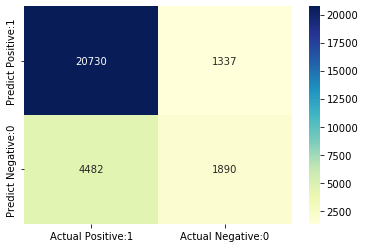

In [243]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [244]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.82      0.94      0.88     22067
         Yes       0.59      0.30      0.39      6372

    accuracy                           0.80     28439
   macro avg       0.70      0.62      0.64     28439
weighted avg       0.77      0.80      0.77     28439



In [246]:
# print classification accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7954


In [252]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[ 6654 15413]
 [  395  5977]] 

 with 12631 correct predictions,  

 15413 Type I errors( False Positives),  

 395 Type II errors( False Negatives),  

 Accuracy score:  0.44414360561201166 

 Sensitivity:  0.9380100439422473 

 Specificity:  0.3015362305705352 



With 0.2 threshold the Confusion Matrix is  

 [[13032  9035]
 [ 1361  5011]] 

 with 18043 correct predictions,  

 9035 Type I errors( False Positives),  

 1361 Type II errors( False Negatives),  

 Accuracy score:  0.6344456556137699 

 Sensitivity:  0.7864092906465788 

 Specificity:  0.5905650972039698 



With 0.3 threshold the Confusion Matrix is  

 [[17054  5013]
 [ 2492  3880]] 

 with 20934 correct predictions,  

 5013 Type I errors( False Positives),  

 2492 Type II errors( False Negatives),  

 Accuracy score:  0.7361018319912795 

 Sensitivity:  0.6089139987445072 

 Specificity:  0.7728282050120089 



With 0.4 threshold the Confusion Matrix is  

 [[19369  2

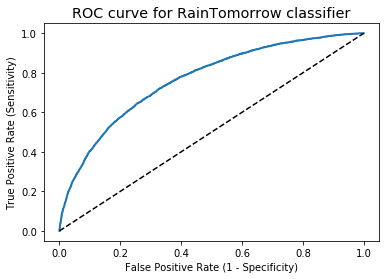

In [254]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [255]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7646


In [256]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8650


## k-Fold Cross Validation 

In [258]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84440244 0.83978726 0.84207288 0.84567711 0.84298901]


In [259]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8430


## Hyperparameter Optimization using GridSearch CV

In [260]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [261]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8431


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [262]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8452
